
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union


Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



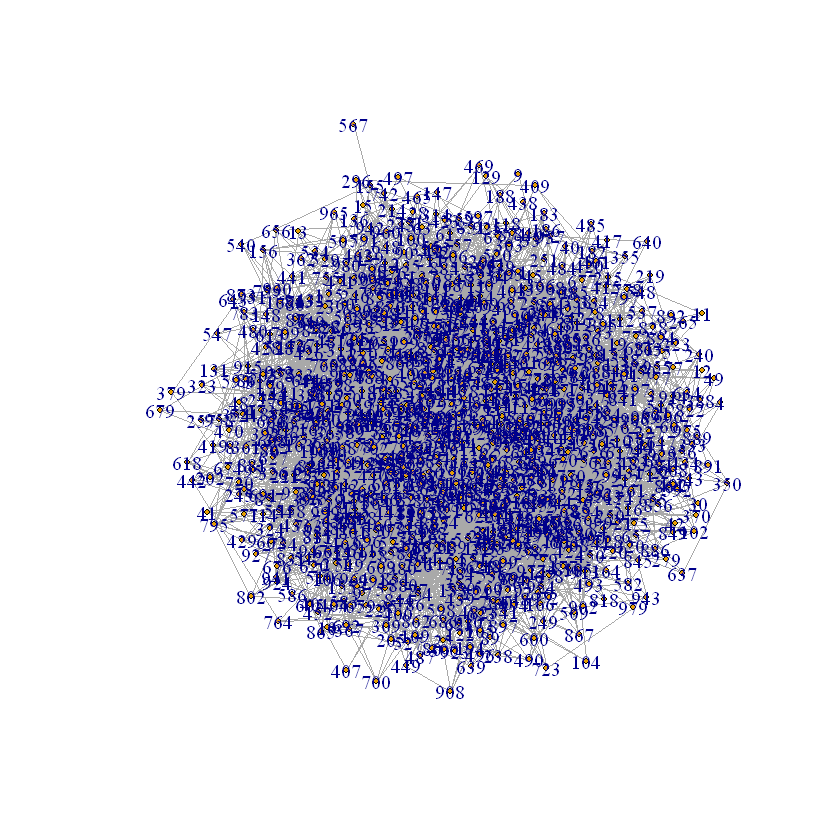

In [1]:
#install.packages("Matrix", type="binary")
#install.packages("pracma", type="binary")

library(igraph)
library(Matrix)
library(pracma)



random_network = random.graph.game(1000,0.01,directed = FALSE)
plot(random_network,vertex.size=2, vertex.label.cex=0)

In [3]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

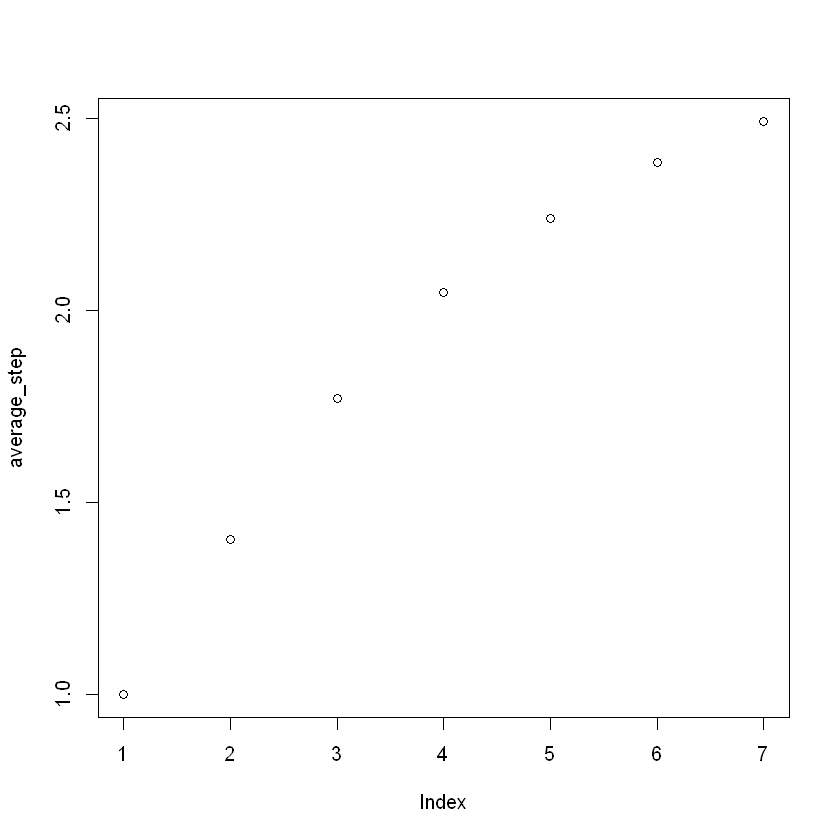

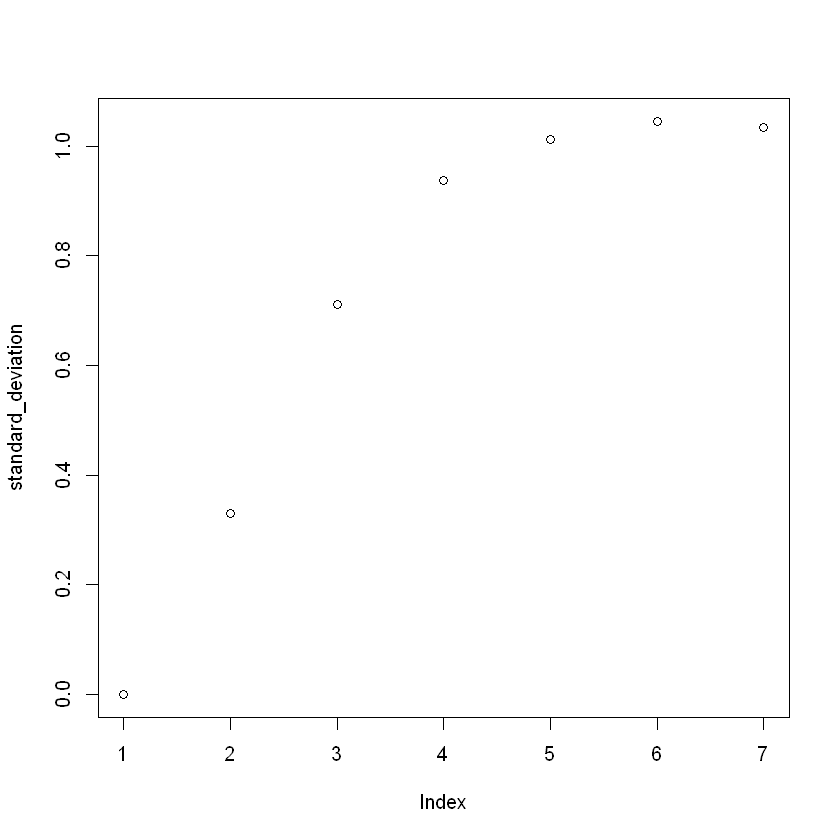

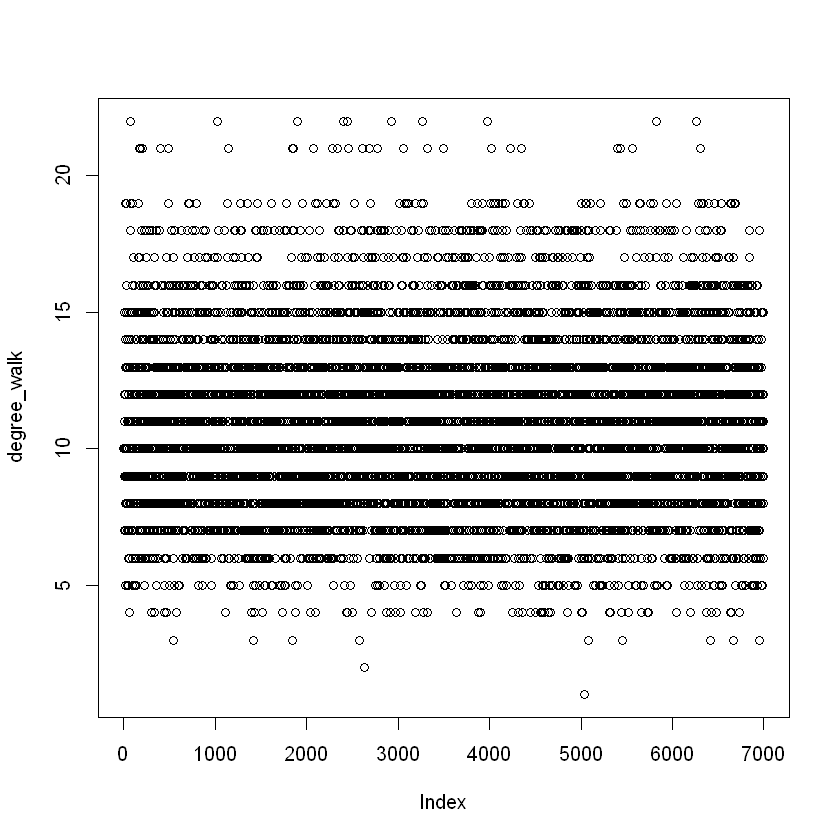

In [8]:
distance = numeric()
average_step = numeric()
degree_walk = numeric()
standard_deviation = numeric()
for (t in 1:7){
    for (n in sample(1:1000)){
        stop_node = random_walk(random_network,t,n)
        shortest_distance = shortest.paths(random_network,n,stop_node)
        if (shortest_distance == Inf){
            shortest_distance = 0
        }
        distance = c(distance, shortest_distance)
        degree_walk = c (degree_walk, degree(random_network, v  = stop_node))
    }
    average_step = c(average_step, mean(distance))
    standard_deviation = c(standard_deviation, mean((distance - mean(distance))**2))
}

plot(average_step)
plot(standard_deviation)
plot(degree_walk)

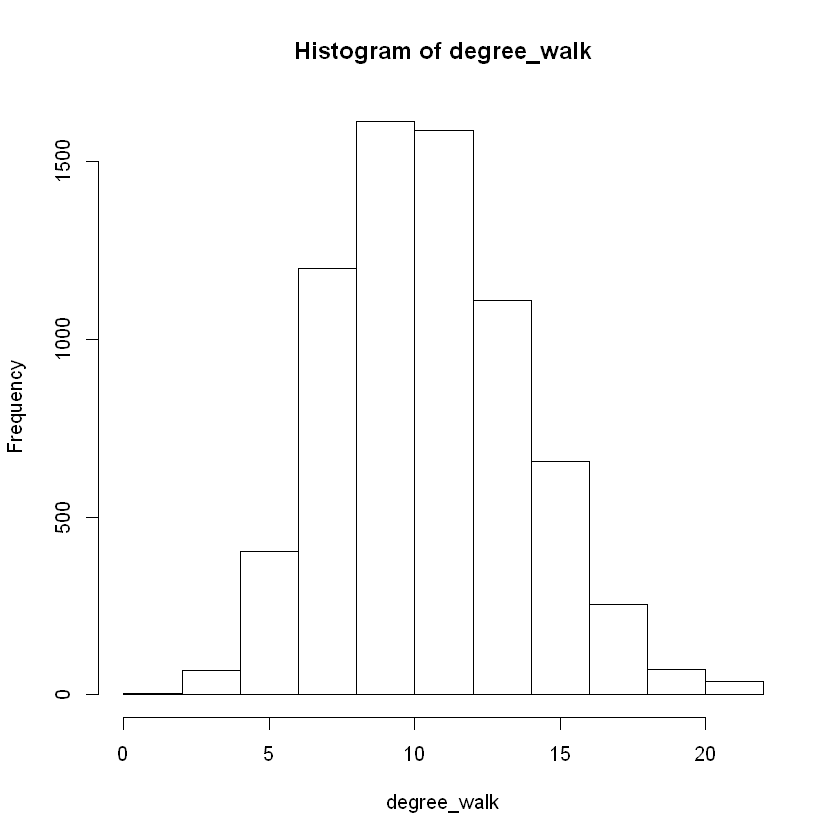

In [9]:
hist(degree_walk)

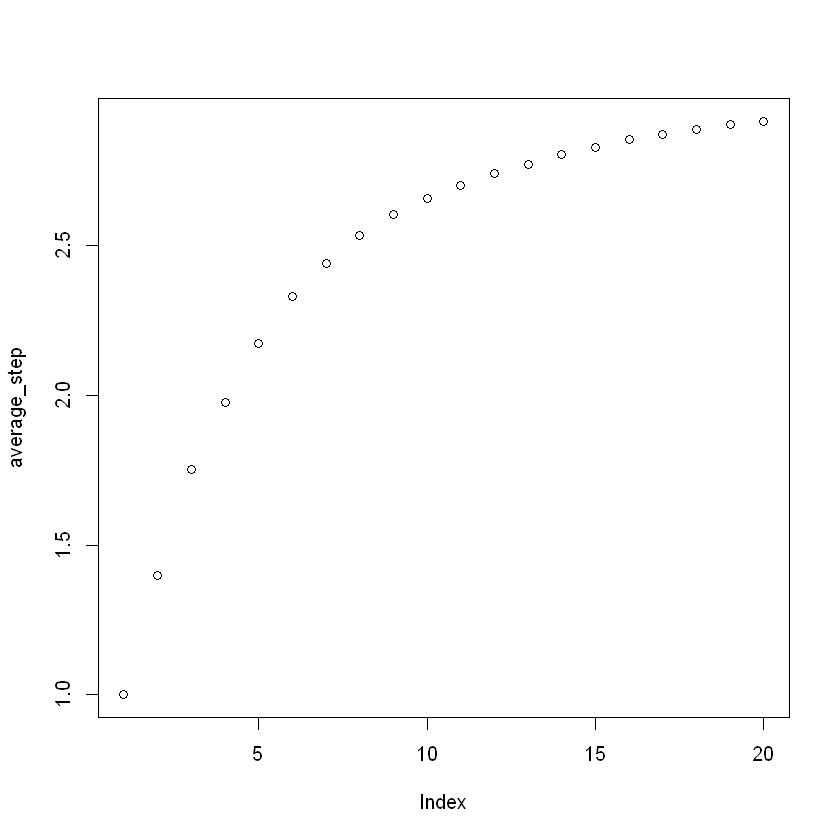

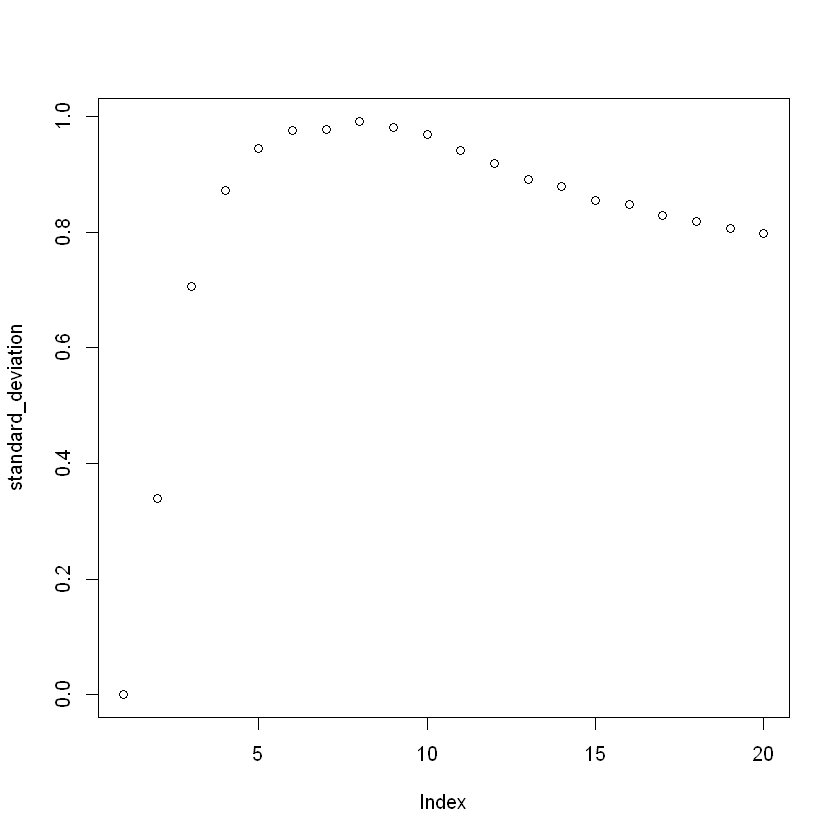

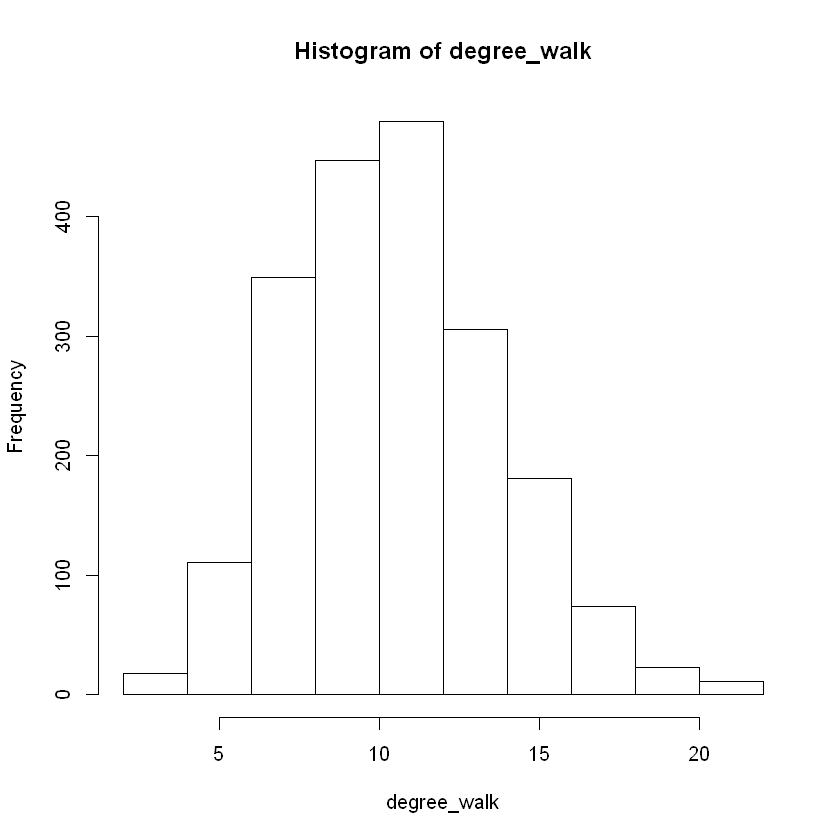

In [13]:
distance = numeric()
average_step = numeric()
degree_walk = numeric()
standard_deviation = numeric()
for (t in 1:20){
    for (n in sample(1:100,replace = TRUE)){
        stop_node = random_walk(random_network,t,n)
        shortest_distance = shortest.paths(random_network,n,stop_node)
        if (shortest_distance == Inf){
            shortest_distance = 0
        }
        distance = c(distance, shortest_distance)
        degree_walk = c (degree_walk, degree(random_network, v  = stop_node))
    }
    average_step = c(average_step, mean(distance))
    standard_deviation = c(standard_deviation, mean((distance - mean(distance))**2))
}

plot(average_step)
plot(standard_deviation)
hist(degree_walk)

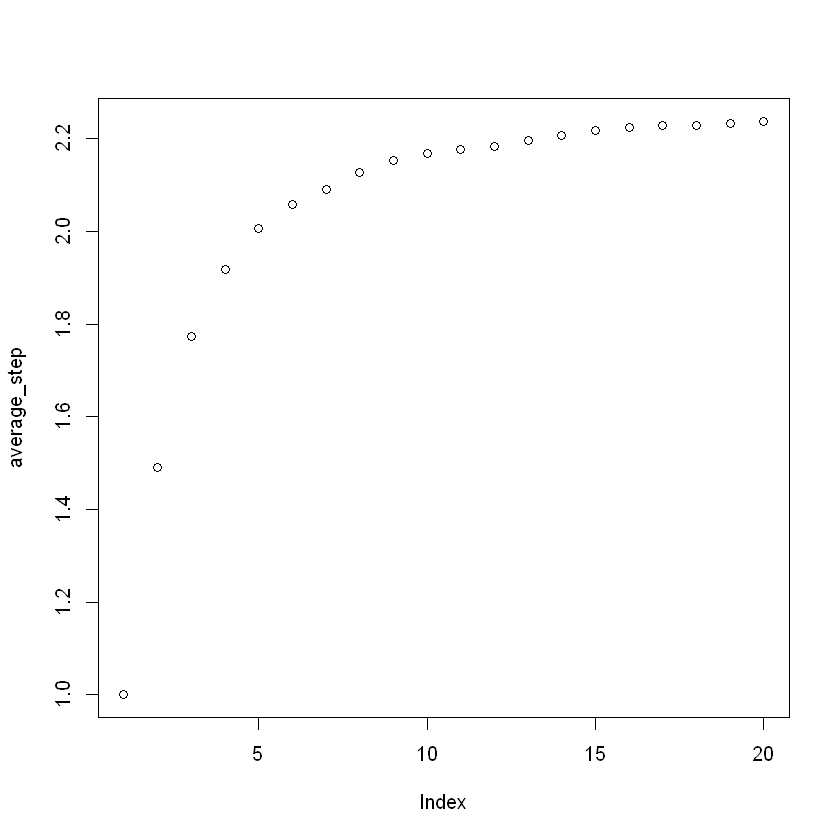

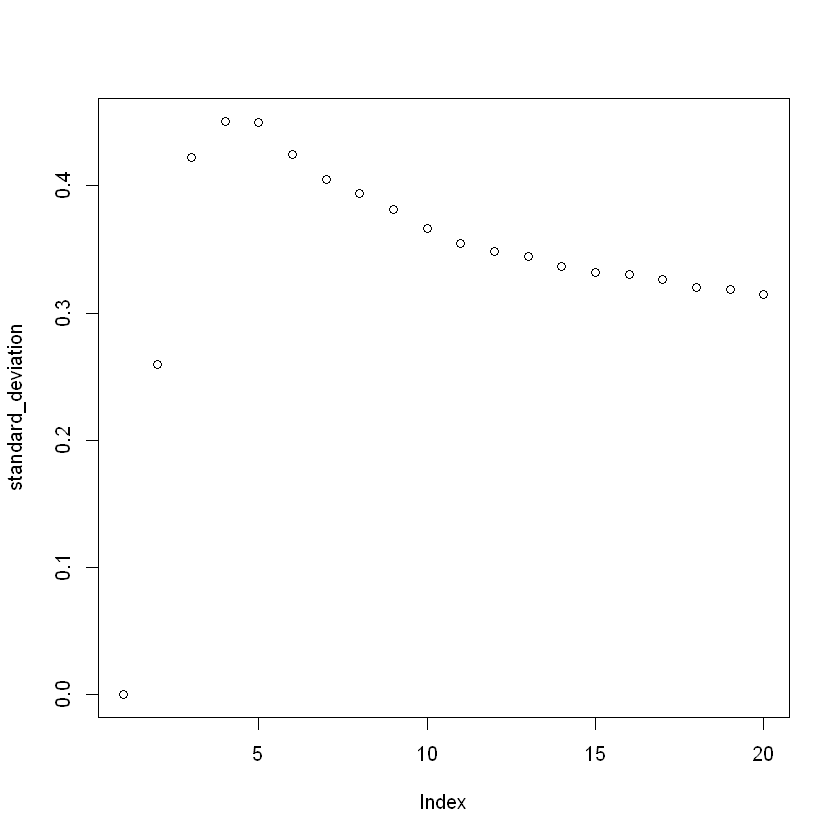

In [6]:
distance = numeric()
average_step = numeric()
degree_walk = numeric()
standard_deviation = numeric()
random_network_large = random.graph.game(10000,0.01,directed = FALSE)
for (t in 1:20){
    for (n in sample(c(1:10000),100)){
        stop_node = random_walk(random_network_large,t,n)
        shortest_distance = shortest.paths(random_network_large,n,stop_node)
        distance = c(distance, shortest_distance)
    }
    average_step = c(average_step, mean(distance))
    standard_deviation = c(standard_deviation, mean((distance - mean(distance))**2))
}

plot(average_step)
plot(standard_deviation)

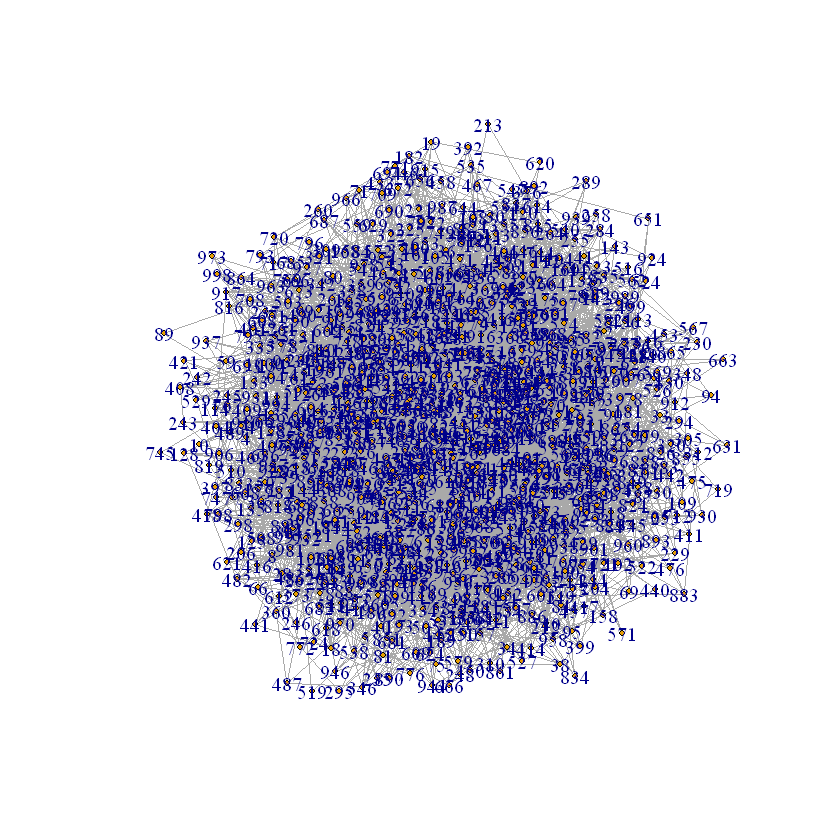

In [6]:
preferental_walk = barabasi.game(1000,m=1,directed=F)
plot(random_network,vertex.size=2, vertex.label.cex=0)

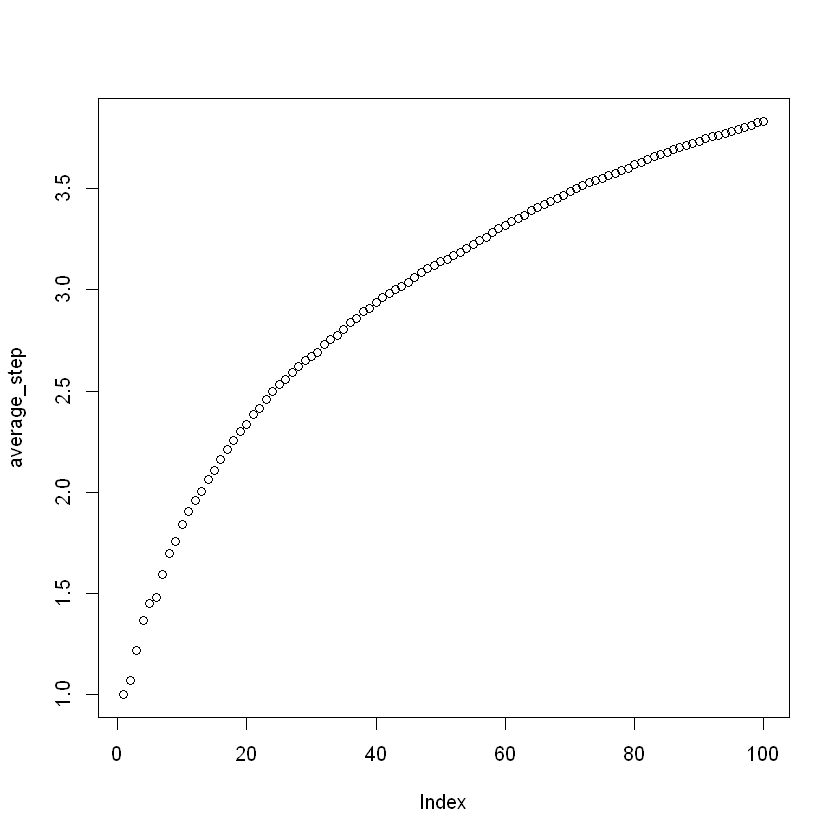

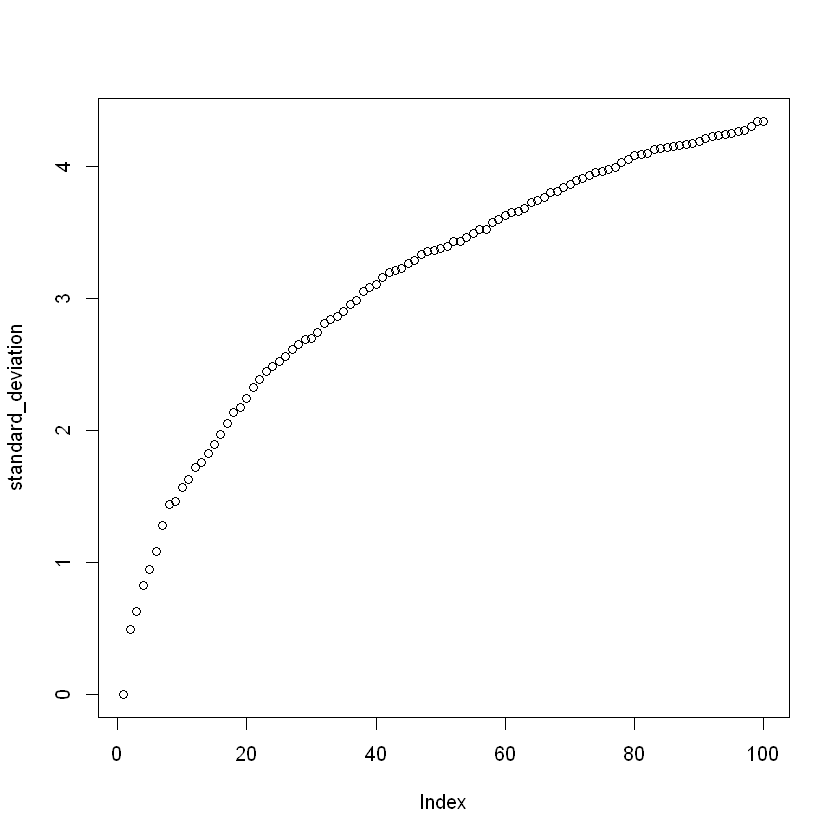

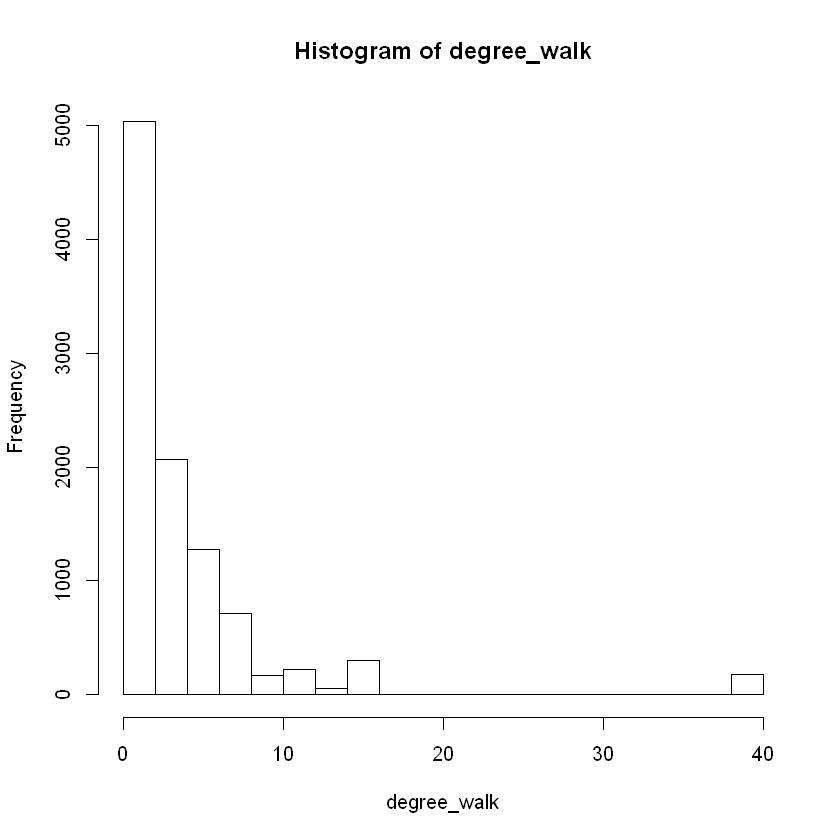

In [9]:

distance = numeric()
average_step = numeric()
degree_walk = numeric()
standard_deviation = numeric()
for (t in 1:100){
    for (n in sample(c(1:1000),100)){
        stop_node = random_walk(preferental_walk,t,n)
        shortest_distance = shortest.paths(preferental_walk,n,stop_node)
        if (shortest_distance == Inf){
            shortest_distance = 0
        }
        distance = c(distance, shortest_distance)
        degree_walk = c (degree_walk, degree(preferental_walk, v  = stop_node))
    }
    average_step = c(average_step, mean(distance))
    standard_deviation = c(standard_deviation, mean((distance - mean(distance))**2))
}

plot(average_step)
plot(standard_deviation)
hist(degree_walk)

In [ ]:
preferental_walk_1 = barabasi.game(100, directed=F)
plot(random_network,vertex.size=2, vertex.label.cex=0)

distance = numeric()
average_step = numeric()
degree_walk = numeric()
standard_deviation = numeric()
for (t in 1:50){
    for (n in sample(1:100)){
        stop_node = random_walk(preferental_walk_1,t,n)
        shortest_distance = shortest.paths(preferental_walk_1,n,stop_node)
        if (shortest_distance == Inf){
            shortest_distance = 0
        }
        distance = c(distance, shortest_distance)
        degree_walk = c (degree_walk, degree(preferental_walk_1, v  = stop_node))
    }
    average_step = c(average_step, mean(distance))
    standard_deviation = c(standard_deviation, mean((distance - mean(distance))**2))
}

plot(average_step)
plot(standard_deviation)
plot(degree_walk)

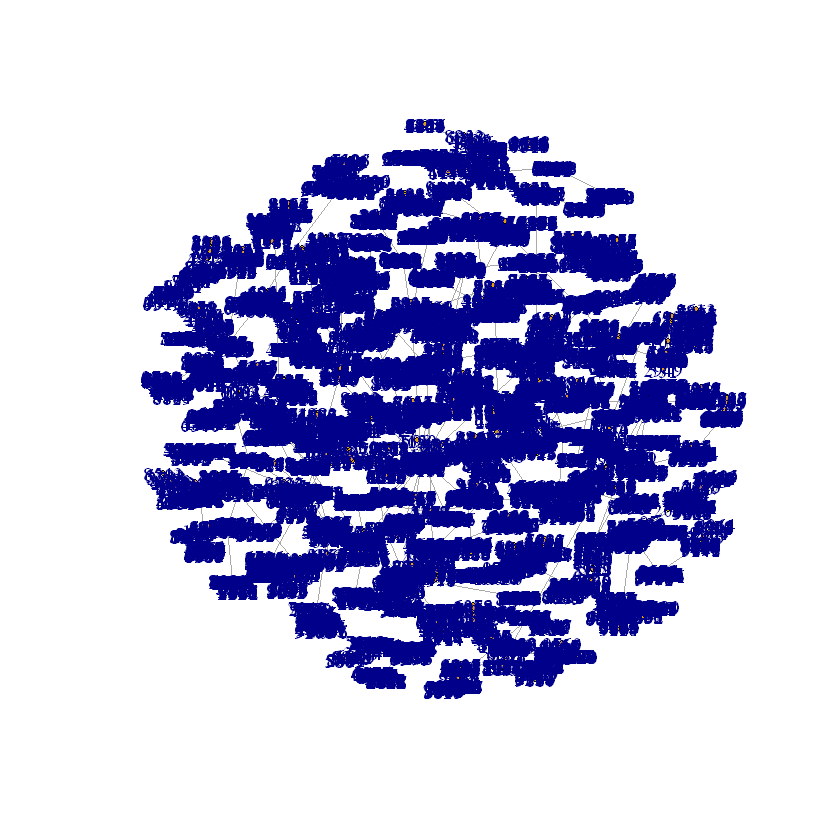

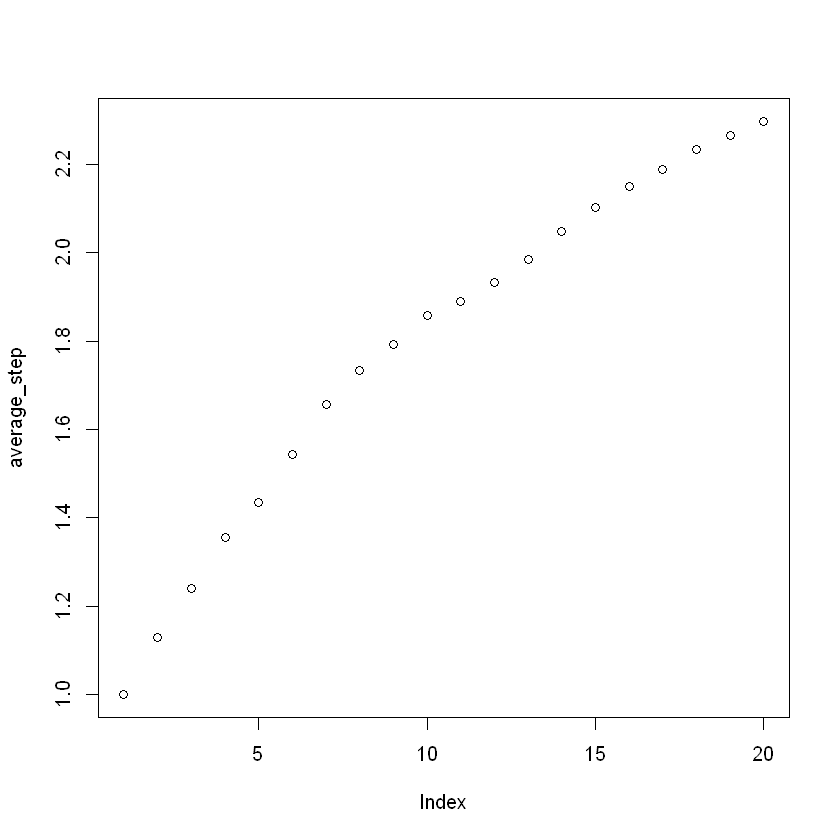

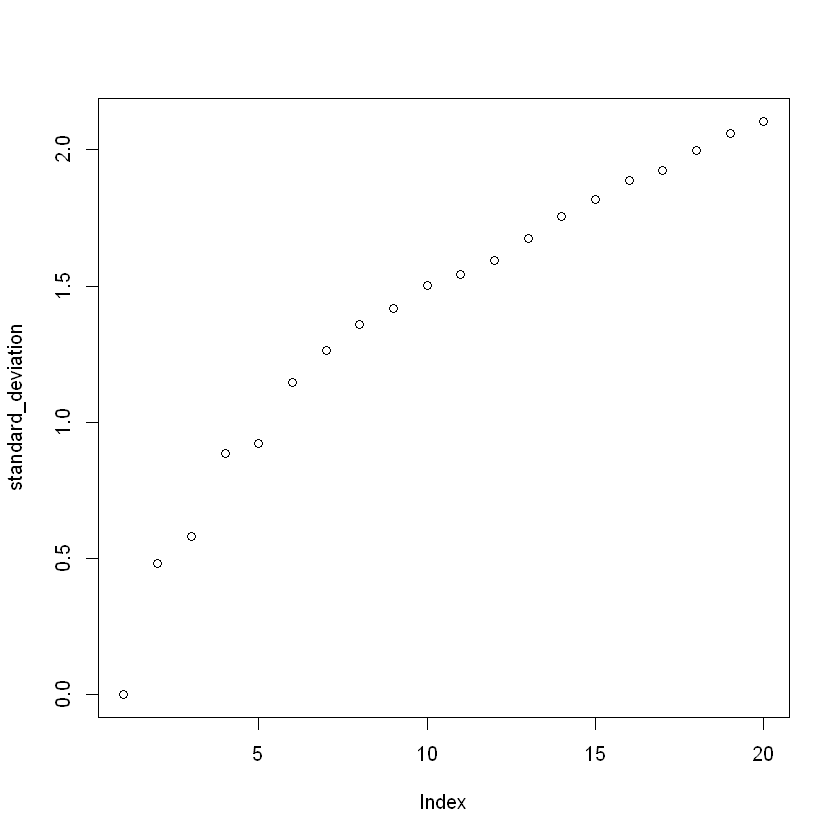

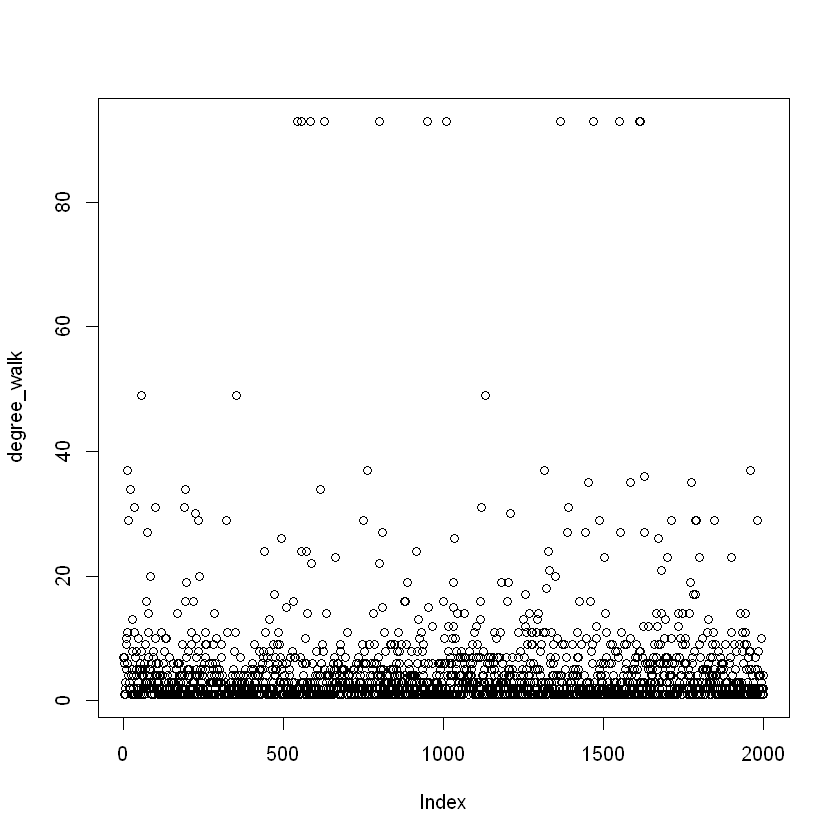

In [4]:
preferental_walk_2 = barabasi.game(10000, directed=F)
plot(preferental_walk_2,vertex.size=2, vertex.label.cex=0)

distance = numeric()
average_step = numeric()
degree_walk = numeric()
standard_deviation = numeric()
for (t in 1:20){
    for (n in sample(c(1:10000),100)){
        stop_node = random_walk(preferental_walk_2,t,n)
        shortest_distance = shortest.paths(preferental_walk_2,n,stop_node)
        if (shortest_distance == Inf){
            shortest_distance = 0
        }
        distance = c(distance, shortest_distance)
        degree_walk = c (degree_walk, degree(preferental_walk_2, v  = stop_node))
    }
    average_step = c(average_step, mean(distance))
    standard_deviation = c(standard_deviation, mean((distance - mean(distance))**2))
}

plot(average_step)
plot(standard_deviation)
plot(degree_walk)